In [1]:
import glob, os
studydir = "."
runrd = os.path.join(studydir,'all5/res')
scores = 'BIC qNML fNML BDeu'.split()
scorecols = dict(zip(scores,range(1,5)))
sss = [25,50,100,200,400,800,1000]
scorecols

{'BDeu': 4, 'BIC': 1, 'fNML': 3, 'qNML': 2}

In [2]:
try:
    os.makedirs(resd)
except:
    pass

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np

Load one prediction column

In [5]:
import numpy as np

def onerep(fn,col):
    a = np.fromfile(fn,sep=' ').reshape(-1,5)
    return a[:,col]

def one_dat(k,g,t,s):
    fmt=os.path.join(runrd,'k%d_%d_%s_x*'%(k,g,t))
    col = scorecols[s]
    return np.vstack(onerep(fn,col) for fn in glob.glob(fmt))

one_dat(4,10,'Jeff','BDeu').shape

(100, 7)

In [6]:
def all_dat(k,t,s):
    return np.vstack(one_dat(k,g,t,s) for g in range(100))

In [7]:
from itertools import product

In [8]:
lstyle = {'BIC':'-.','BDeu':':', 'fNML':'--', 'qNML':'-'}

### WARNING, A SLOW CELL 

In [9]:
datas={}
for (k, t) in product((4,7),('Jeff','BDeu')):
    for s in 'BIC BDeu fNML qNML'.split():
        print(k,t,s)
        datas[(k,t,s)] = all_dat(k,t,s)

(4, 'Jeff', 'BIC')
(4, 'Jeff', 'BDeu')
(4, 'Jeff', 'fNML')
(4, 'Jeff', 'qNML')
(4, 'BDeu', 'BIC')
(4, 'BDeu', 'BDeu')
(4, 'BDeu', 'fNML')
(4, 'BDeu', 'qNML')
(7, 'Jeff', 'BIC')
(7, 'Jeff', 'BDeu')
(7, 'Jeff', 'fNML')
(7, 'Jeff', 'qNML')
(7, 'BDeu', 'BIC')
(7, 'BDeu', 'BDeu')
(7, 'BDeu', 'fNML')
(7, 'BDeu', 'qNML')


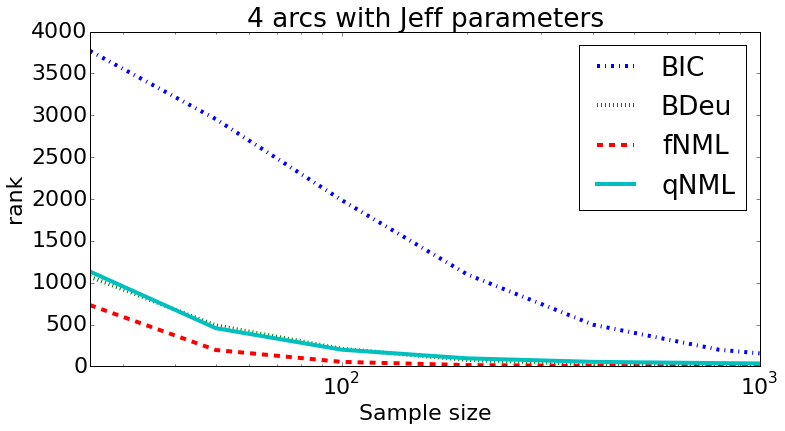

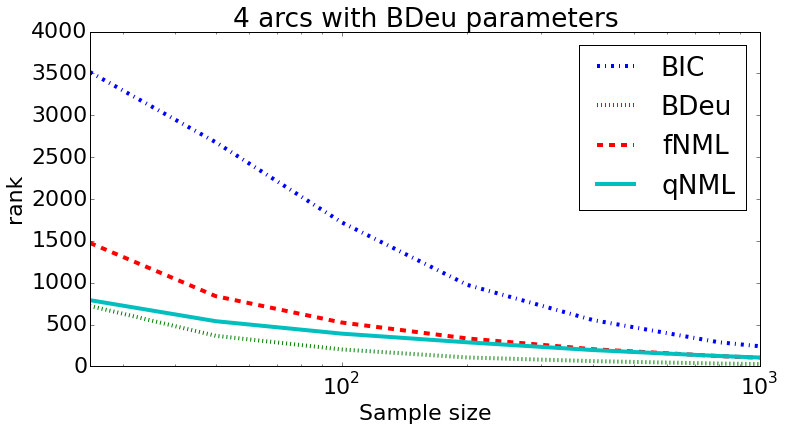

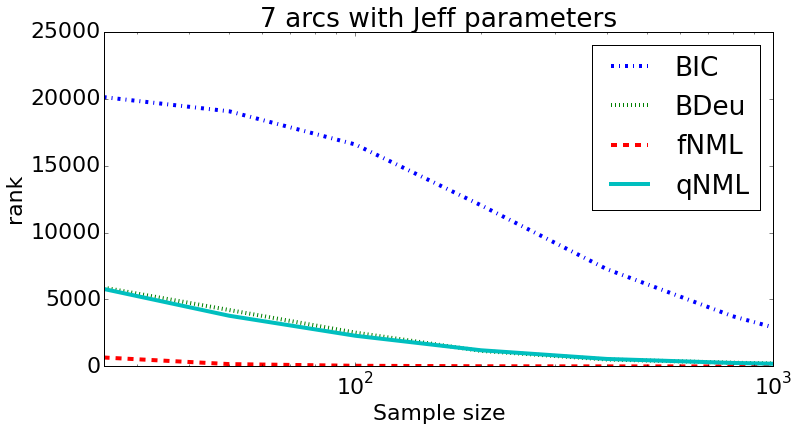

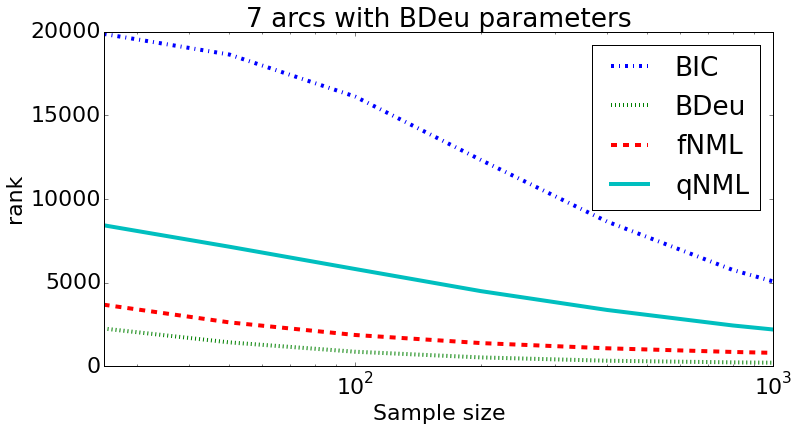

In [15]:
for (k, t) in product((4,7),('Jeff','BDeu')):
    plt.figure(figsize=(12,6))
    plt.xlim((25,1000))
    plt.rcParams.update({'font.size':22})
    plt.title('%d arcs with %s parameters' % (k,t))
    plt.xlabel('Sample size')
    plt.ylabel('rank')
    for s in 'BIC BDeu fNML qNML'.split():
        ds = datas[k,t,s]
        plt.semilogx(sss,ds.mean(axis=0),lw=4,linestyle=lstyle[s],label=s)
    plt.legend(loc='upper right')
    plt.savefig('qNML_images/art%d_%s_mean.pdf' % (k,t), bbox_inches='tight')
        

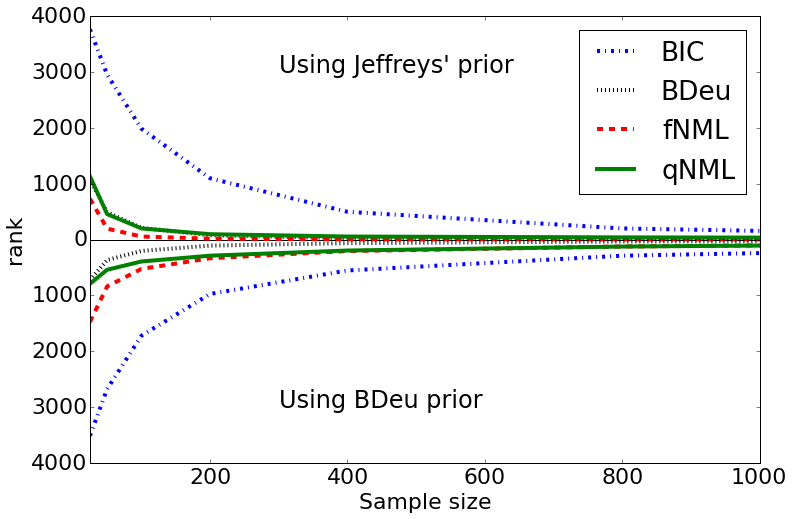

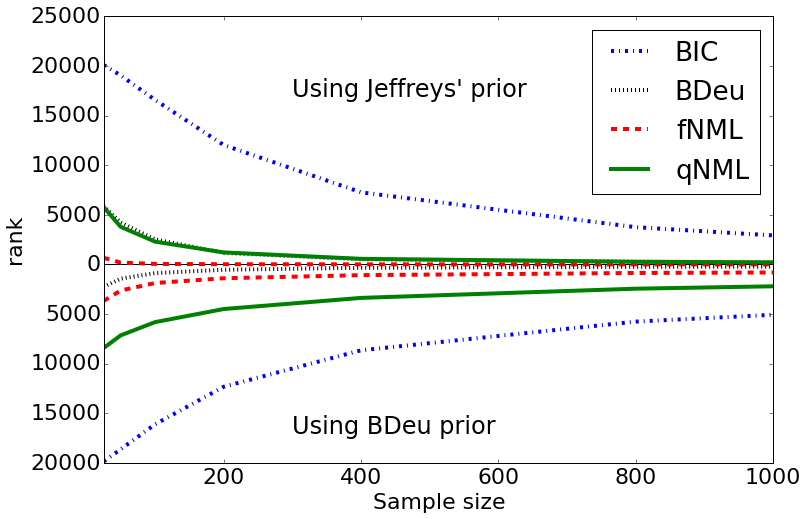

In [73]:
txty = {4:3000,7:17000}
colors = {'BIC':'blue','BDeu':'black','fNML':'red','qNML':'green'}
for k in (4,7):
    fig=plt.figure(figsize=(12,8))
    plt.xlim((25,1000))
    plt.rcParams.update({'font.size':22})
    # plt.title('%d arcs' % k)
    plt.xlabel('Sample size')
    plt.ylabel('rank')
    
    t = 'Jeff'
    for i,s in enumerate('BIC BDeu fNML qNML'.split()):
        ds = datas[k,t,s]
        plt.plot(sss,ds.mean(axis=0),lw=4,linestyle=lstyle[s],color=colors[s],label=s)
    plt.legend(loc='upper right')
    plt.text(300,txty[k],'Using Jeffreys\' prior',fontsize=24)

    hlines(0,25,1000)
    
    t = 'BDeu'
    for s in 'BIC BDeu fNML qNML'.split():
        ds = datas[k,t,s]
        plt.plot(sss,-ds.mean(axis=0),lw=4,linestyle=lstyle[s],color=colors[s])
    plt.text(300,-txty[k],'Using BDeu prior',fontsize=24)
    if k == 4:
        fig.get_axes()[0].set_yticklabels('4000 3000 2000 1000 0 1000 2000 3000 4000'.split())
    else:
        fig.get_axes()[0].set_yticklabels('20000 15000 10000 5000 0 5000 10000 15000 20000 25000'.split())
    plt.savefig('qNML_images/art%d_mean.pdf' % k, bbox_inches='tight')
